# Handwritten Digit Recognition using Convolutional Neural Network (CNN) with Tensorflow

### Import the dependencies and load the dataset 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd 
import math
import datetime
import platform


### Lets look at the versions

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.8.5
Tensorflow version: 2.4.0
Keras version: 2.4.0


### Load the TensorBoard notebook extension.

In [3]:
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


### Load the dataset

In [5]:
train = pd.read_csv(r'C:\Users\nikip\Documents\2022\TCE\hand_written_digits_input\train.csv')
test = pd.read_csv(r'C:\Users\nikip\Documents\2022\TCE\hand_written_digits_input\test.csv')

### Data Overview 

- The MNIST dataset contains 42,000 training images of handwritten digits from zero to nine (10 different classes) and 28,000 images for testing without the label identifier (for submission). These images are the grayscaled pixel value and are represented as a 28×28 matrix.

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [8]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [9]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

### Splitting data into training and validation dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

### Dimension of training and validation data

In [12]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


### Converting training, testing, and validation data into array

In [13]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

### Dimension of training, testing, and validation data after reshaping

In [14]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [15]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


### Explore the data

In [16]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


### Visualise how the digits were written 

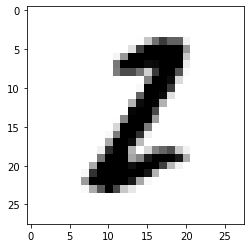

In [17]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

### some more training examples

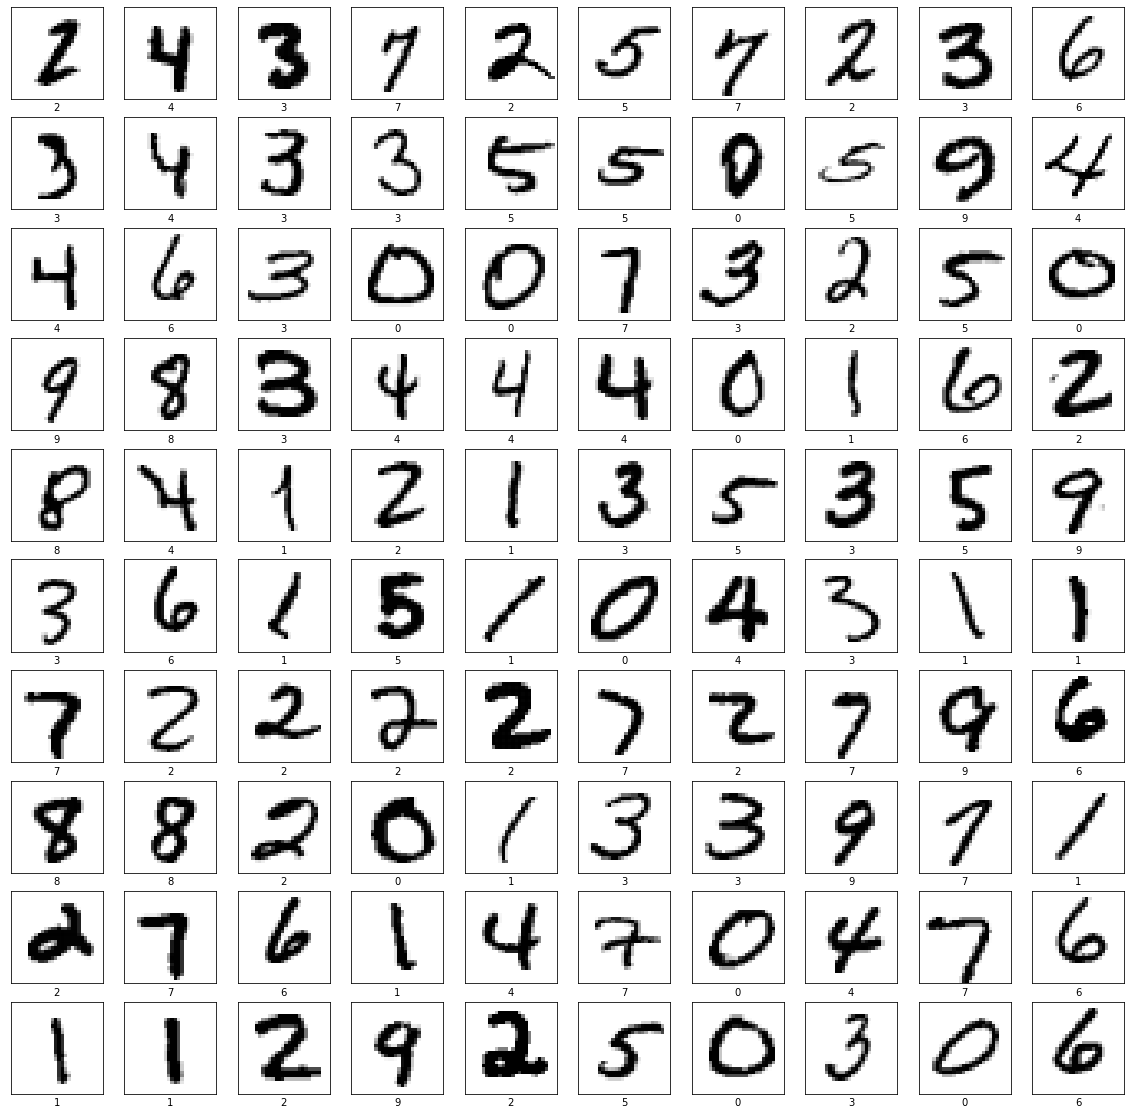

In [18]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

### Reshaping train, test, and validation data

- In order to use convolution layers we need to reshape our data and add a color channel to it.
- As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. 
- We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [19]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)


x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [20]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


### Normalize train, test, and validation data 

- Here we're just trying to normalize from values range of [0...255] to [0...1].

In [21]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

### Build the CNN model to Classify Handwritten Digits 

In [22]:
model = tf.keras.models.Sequential()



model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))


model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Compile the model using keras.optimizers.Adam

In [29]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

### Train the model

In [30]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 16s 14ms/step - loss: 0.5844 - accuracy: 0.8228 - val_loss: 0.0922 - val_accuracy: 0.9713
Epoch 2/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 3/10
1050/1050 [==============================] - 15s 15ms/step - loss: 0.0673 - accuracy: 0.9789 - val_loss: 0.0608 - val_accuracy: 0.9824
Epoch 4/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 5/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0483 - val_accuracy: 0.9843
Epoch 6/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 7/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.0460 -

In [31]:
### Model evaluation

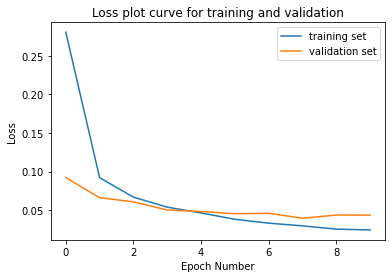

In [32]:
# Loss plot curve for training and validation
plt.title("Loss plot curve for training and validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

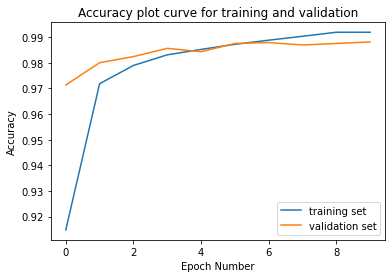

In [33]:
# Accuracy plot curve for training and validation
plt.title("Accuracy plot curve for training and validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

###  Performance of training dataset

In [34]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)



In [35]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.01040507573634386
Train accuracy:  0.9971428513526917


### Performance of validation dataset 

In [36]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)



In [37]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.043607037514448166
Validation accuracy:  0.988095223903656


### Save and load the model

- We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file.

In [38]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [39]:
loaded_model = tf.keras.models.load_model(model_name)

###  Visualise validation predicted data on how the digits were written

In [40]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

In [41]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [42]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.923180e-08,9.999987e-01,1.780611e-07,3.601147e-15,9.221845e-08,4.169418e-12,4.084911e-07,6.105228e-08,5.963140e-08,5.230723e-07
1,6.654936e-15,5.232055e-11,5.388448e-15,9.999999e-01,2.013469e-16,3.928166e-09,1.289808e-16,3.723174e-12,9.730147e-10,6.426630e-08
2,4.583513e-08,7.744173e-08,2.028151e-06,2.231621e-05,1.089048e-11,7.834567e-07,3.050670e-08,6.552686e-10,9.999707e-01,4.039890e-06
3,2.633449e-08,9.999682e-01,6.129196e-07,2.312883e-10,1.337620e-05,4.454426e-09,9.085552e-06,2.488753e-06,1.395408e-06,4.912523e-06
4,1.600488e-11,1.000682e-13,2.190113e-11,2.566005e-08,1.468838e-06,7.620791e-11,2.206611e-16,2.264104e-07,5.746864e-06,9.999925e-01
...,...,...,...,...,...,...,...,...,...,...
8395,4.537022e-17,5.390993e-13,2.752939e-14,2.887946e-18,1.000000e+00,6.445959e-14,3.181871e-10,1.331949e-16,5.913269e-15,2.941960e-13
8396,6.732026e-10,1.143242e-13,1.947748e-14,6.896475e-09,1.173098e-12,9.999217e-01,5.545528e-05,2.024115e-16,2.293081e-05,8.497539e-14
8397,2.310015e-10,4.672682e-10,2.117295e-11,2.630458e-10,9.673021e-07,1.343038e-09,3.028866e-12,9.999980e-01,7.249526e-11,1.085652e-06
8398,7.943470e-10,1.365144e-15,8.807083e-11,5.284292e-13,3.350905e-11,2.785122e-08,1.000000e+00,4.915421e-21,6.398603e-10,1.368048e-15


In [43]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


- So our model is predicting that the first example from the validation set is 1.

- Let's print the first image from a validation set to see if model's prediction is correct.

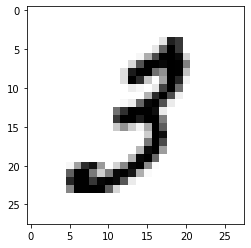

In [45]:
plt.imshow(x_validation_normalized[1].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

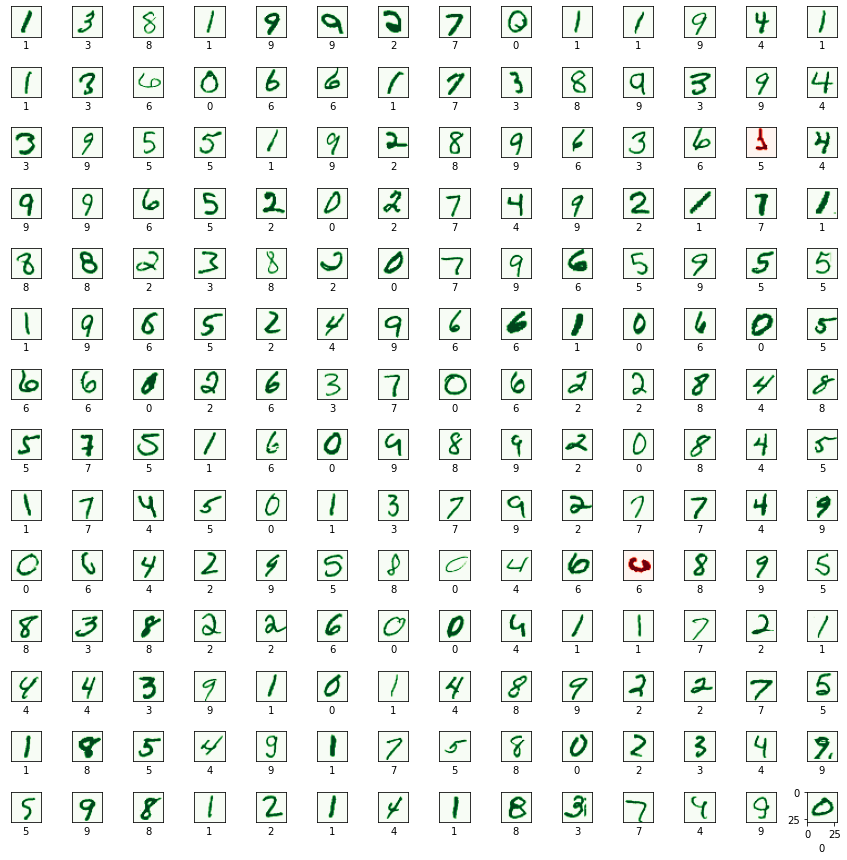

In [46]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)
    
plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

### Confusion matrix of validation dataset

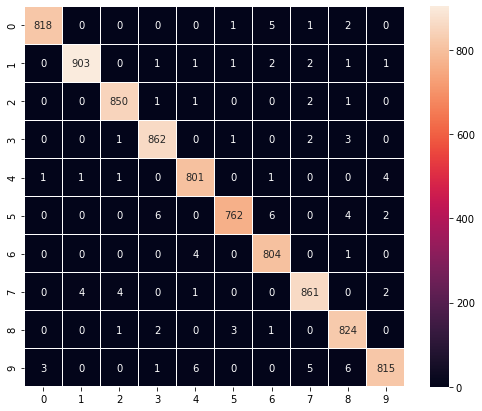

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()